Loading the dataset

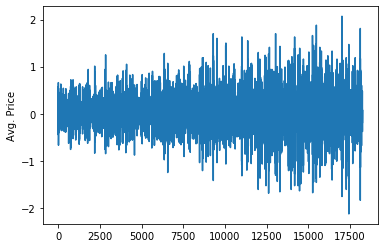

In [34]:
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\Avocado\\avocado.csv',
                      usecols=[2]).values.astype('float32')


def delta_time_series(data):
    return data[1:] - data[:-1]

dataset = delta_time_series(dataset)

dataset.shape


def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('Avg. Price')
    plt.show()

plot_delta(dataset)

In [35]:
# Helper function to get y as a numpy array from the TimeseriesGenerator
def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y



In [38]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [39]:
# split into train and test sets

train, val, test = dataset[0:12000, :], dataset[12001:13000, :], dataset[13001:None, :]

lookback = 84
step = 2
batch_size = 128

train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,shuffle=True,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (13000 - 12001 - lookback)
test_steps = (len(dataset) - 13001 - lookback)

Epoch 1/10
500/500 [==============================] - 26s 51ms/step - loss: 0.0449 - val_loss: 0.0727
Epoch 2/10
500/500 [==============================] - 25s 50ms/step - loss: 0.0401 - val_loss: 0.0546
Epoch 3/10
500/500 [==============================] - 24s 49ms/step - loss: 0.0396 - val_loss: 0.0729
Epoch 4/10
500/500 [==============================] - 24s 49ms/step - loss: 0.0393 - val_loss: 0.0602
Epoch 5/10
500/500 [==============================] - 25s 49ms/step - loss: 0.0395 - val_loss: 0.0445
Epoch 6/10
500/500 [==============================] - 24s 48ms/step - loss: 0.0393 - val_loss: 0.0391
Epoch 7/10
500/500 [==============================] - 24s 47ms/step - loss: 0.0392 - val_loss: 0.0849
Epoch 8/10
500/500 [==============================] - 24s 48ms/step - loss: 0.0389 - val_loss: 0.0912
Epoch 9/10
500/500 [==============================] - 24s 48ms/step - loss: 0.0391 - val_loss: 0.0668
Epoch 10/10
500/500 [==============================] - 24s 48ms/step - loss: 0.038

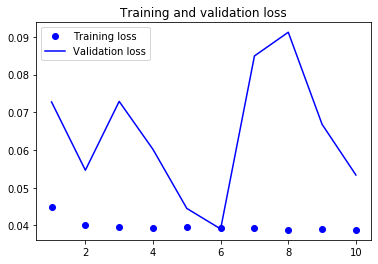

In [40]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/20
500/500 [==============================] - 28s 56ms/step - loss: 0.0517 - val_loss: 0.0702
Epoch 2/20
500/500 [==============================] - 28s 56ms/step - loss: 0.0402 - val_loss: 0.0553
Epoch 3/20
500/500 [==============================] - 28s 55ms/step - loss: 0.0397 - val_loss: 0.0736
Epoch 4/20
500/500 [==============================] - 26s 52ms/step - loss: 0.0395 - val_loss: 0.0597
Epoch 5/20
500/500 [==============================] - 31s 63ms/step - loss: 0.0389 - val_loss: 0.0452
Epoch 6/20
500/500 [==============================] - 29s 57ms/step - loss: 0.0390 - val_loss: 0.0393
Epoch 7/20
500/500 [==============================] - 27s 55ms/step - loss: 0.0390 - val_loss: 0.0836
Epoch 8/20
500/500 [==============================] - 29s 58ms/step - loss: 0.0389 - val_loss: 0.0900
Epoch 9/20
500/500 [==============================] - 27s 55ms/step - loss: 0.0391 - val_loss: 0.0668
Epoch 10/20
500/500 [==============================] - 28s 56ms/step - loss: 0.038

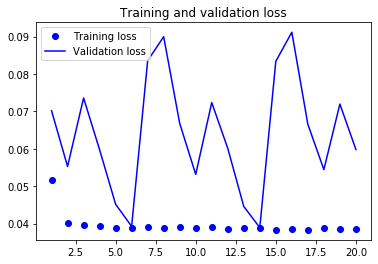

In [7]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen, steps_per_epoch=500, epochs=20,
validation_data=val_data_gen,
validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/40
500/500 [==============================] - 29s 58ms/step - loss: 0.0521 - val_loss: 0.0681
Epoch 2/40
500/500 [==============================] - 31s 61ms/step - loss: 0.0396 - val_loss: 0.0531
Epoch 3/40
500/500 [==============================] - 29s 58ms/step - loss: 0.0392 - val_loss: 0.0730
Epoch 4/40
500/500 [==============================] - 30s 60ms/step - loss: 0.0389 - val_loss: 0.0608
Epoch 5/40
500/500 [==============================] - 28s 56ms/step - loss: 0.0390 - val_loss: 0.0447
Epoch 6/40
500/500 [==============================] - 30s 60ms/step - loss: 0.0392 - val_loss: 0.0389
Epoch 7/40
500/500 [==============================] - 28s 57ms/step - loss: 0.0390 - val_loss: 0.0831
Epoch 8/40
500/500 [==============================] - 30s 59ms/step - loss: 0.0389 - val_loss: 0.0927
Epoch 9/40
500/500 [==============================] - 29s 58ms/step - loss: 0.0389 - val_loss: 0.0673
Epoch 10/40
500/500 [==============================] - 30s 60ms/step - loss: 0.039

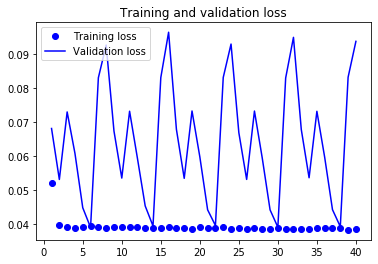

In [8]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2,input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen,steps_per_epoch=500,epochs=40,validation_data=val_data_gen,
validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/40
500/500 [==============================] - 78s 157ms/step - loss: 2267105.6069 - val_loss: 0.1451
Epoch 2/40
500/500 [==============================] - 83s 165ms/step - loss: 0.0416 - val_loss: 0.0619
Epoch 3/40
500/500 [==============================] - 82s 164ms/step - loss: 0.0385 - val_loss: 0.0765
Epoch 4/40
500/500 [==============================] - 81s 163ms/step - loss: 0.0386 - val_loss: 0.0615
Epoch 5/40
500/500 [==============================] - 74s 148ms/step - loss: 0.0384 - val_loss: 0.0473
Epoch 6/40
500/500 [==============================] - 69s 138ms/step - loss: 0.0385 - val_loss: 0.0403
Epoch 7/40
500/500 [==============================] - 74s 149ms/step - loss: 0.0387 - val_loss: 0.0837
Epoch 8/40
500/500 [==============================] - 62s 125ms/step - loss: 0.0387 - val_loss: 0.0927
Epoch 9/40
500/500 [==============================] - 62s 123ms/step - loss: 0.0385 - val_loss: 0.0674
Epoch 10/40
500/500 [==============================] - 61s 122ms/st

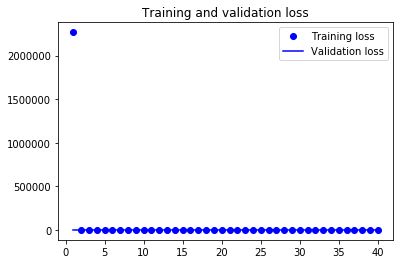

In [9]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,dropout=0.1,recurrent_dropout=0.5,return_sequences=True,
input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',dropout=0.1,recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit_generator(train_data_gen,steps_per_epoch=500,epochs=40,validation_data=val_data_gen,validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [11]:
test_loss = model.evaluate_generator(test_data_gen,steps=test_steps)
print('test loss:', test_loss)

test loss: 0.039982397109270096


In [12]:
testPredict = model.predict_generator(test_data_gen)
testPredict.shape

(5163, 1)

In [13]:
testPredict = scaler.inverse_transform(testPredict)

In [14]:
testY = get_y_from_generator(test_data_gen)

(5163, 1)


In [15]:
testY = scaler.inverse_transform(testY)

In [16]:
from sklearn.metrics import mean_squared_error
import math
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.22 RMSE


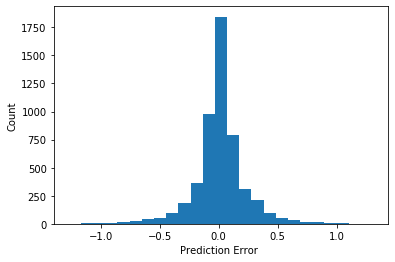

In [17]:
# error distribution
error = testPredict - testY
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ")
_ = plt.ylabel("Count")